In [51]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

In [52]:
data = pd.read_csv('https://github.com/hilaler/Data-Set-Analysis-Parking-Birmingham-Data-Set/blob/main/dataset.csv?raw=true')
data

,SystemCodeNumber,Capacity,Occupancy,LastUpdated
0,BHMBCCMKT01,577,61,10/4/2016 7:59
1,BHMBCCMKT01,577,64,10/4/2016 8:25
2,BHMBCCMKT01,577,80,10/4/2016 8:59
3,BHMBCCMKT01,577,107,10/4/2016 9:32
4,BHMBCCMKT01,577,150,10/4/2016 9:59
...,...,...,...,...
35712,Shopping,1920,1517,12/19/2016 14:30
35713,Shopping,1920,1487,12/19/2016 15:03
35714,Shopping,1920,1432,12/19/2016 15:29
35715,Shopping,1920,1321,12/19/2016 16:03


In [53]:
data.describe()

,Capacity,Occupancy
count,35717.000000,35717.000000
mean,1397.550130,642.228911
std,1179.326833,656.955535
min,220.000000,-8.000000
25%,500.000000,210.000000
50%,849.000000,446.000000
75%,2009.000000,798.000000
max,4675.000000,4327.000000


In [54]:
print('Number of instances before= %d' % (data.shape[0]))
print('Number of attributes before= %d' % (data.shape[1]))

Number of instances before= 35717
Number of attributes before= 4


In [55]:
data.dropna(inplace = True)
data.drop_duplicates(keep='first',inplace=True)

print('Number of instances before= %d' % (data.shape[0]))
print('Number of attributes before= %d' % (data.shape[1]))

Number of instances before= 35501
Number of attributes before= 4


In [57]:
data.describe()

,Capacity,Occupancy
count,35501.000000,35501.000000
mean,1399.242613,644.853582
std,1179.939451,657.822376
min,220.000000,-8.000000
25%,500.000000,212.000000
50%,863.000000,448.000000
75%,2009.000000,802.000000
max,4675.000000,4327.000000


In [58]:
dateTime = data['LastUpdated'].str.split(" ", n = 1, expand = True) 
date = dateTime[0]
time = dateTime[1]
data['Date'] = date
data['Time'] = time
day_name = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
data['Day'] = pd.to_datetime(data['Date']).dt.dayofweek.apply(lambda x: day_name[x])

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35501 entries, 0 to 35716
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   SystemCodeNumber  35501 non-null  object
 1   Capacity          35501 non-null  int64 
 2   Occupancy         35501 non-null  int64 
 3   LastUpdated       35501 non-null  object
 4   Date              35501 non-null  object
 5   Time              35501 non-null  object
 6   Day               35501 non-null  object
dtypes: int64(2), object(5)
memory usage: 2.2+ MB


In [60]:
data['OccupancyRate'] = (100.0*data['Occupancy'])/data['Capacity']

In [67]:
data

,SystemCodeNumber,Capacity,Occupancy,LastUpdated,Date,Time,Day,OccupancyRate
0,BHMBCCMKT01,577,61,10/4/2016 7:59,10/4/2016,7:59,Tue,10.571924
1,BHMBCCMKT01,577,64,10/4/2016 8:25,10/4/2016,8:25,Tue,11.091854
2,BHMBCCMKT01,577,80,10/4/2016 8:59,10/4/2016,8:59,Tue,13.864818
3,BHMBCCMKT01,577,107,10/4/2016 9:32,10/4/2016,9:32,Tue,18.544194
4,BHMBCCMKT01,577,150,10/4/2016 9:59,10/4/2016,9:59,Tue,25.996534
...,...,...,...,...,...,...,...,...
35712,Shopping,1920,1517,12/19/2016 14:30,12/19/2016,14:30,Mon,79.010417
35713,Shopping,1920,1487,12/19/2016 15:03,12/19/2016,15:03,Mon,77.447917
35714,Shopping,1920,1432,12/19/2016 15:29,12/19/2016,15:29,Mon,74.583333
35715,Shopping,1920,1321,12/19/2016 16:03,12/19/2016,16:03,Mon,68.802083


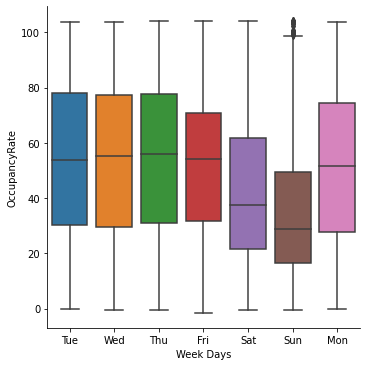

In [68]:
box = sns.catplot(x = "Day",y="OccupancyRate",kind='box',data=data)
box.set(xlabel="Week Days", ylabel = "OccupancyRate")

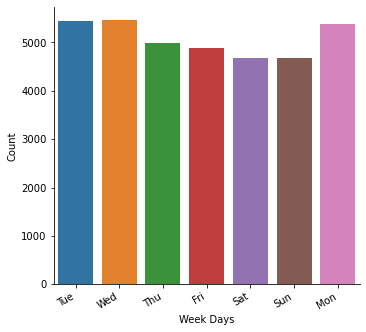

In [69]:
graph = sns.catplot(x='Day', kind='count', data=data)
graph.fig.autofmt_xdate()
graph.set(xlabel="Week Days", ylabel = "Count")